# Imports

In [192]:
import os
import nltk
import pickle
import gensim
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
from gensim import corpora
import matplotlib.cm as cm
from textblob import TextBlob
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import WordPunctTokenizer, sent_tokenize, word_tokenize, TreebankWordTokenizer

%matplotlib inline

# Vectorization

In [158]:
'''Read in pickle file -- list of songs'''

flat_test = pickle.load(open("flat_test.p", "rb"))

In [163]:
'''Count Vectorizer'''

count_vectorizer = CountVectorizer(ngram_range=(1, 3),  
                                   stop_words='english',
                                   token_pattern="\\b[a-z][a-z]+\\b", 
                                   max_features=1000)
counts = count_vectorizer.fit_transform(flat_test[100:150])

In [164]:
'''Tfidf Vectorizer'''

tfidf = TfidfVectorizer(ngram_range=(1, 3),  
                                   stop_words='english',
                                   token_pattern="\\b[a-z][a-z]+\\b", 
                                   max_features=1000)
tfidf_counts = tfidf.fit_transform(flat_lyrics[:10000])

In [28]:
'''Put counts into array'''

x_back_tfidf = tfidf_counts.toarray()

In [29]:
'''Put TFIDF counts into DataFrame'''

TFIDF_df = pd.DataFrame(x_back_tfidf, columns=tfidf.get_feature_names())
# TFIDF_df.index = list_of_tags
TFIDF_df = TFIDF_df.round(2)
TFIDF_df.head(10)

,afraid,agnetha,ah,aha,aha mm,ahha,ahhah,ahhah honey,ahhah honey honey,aint,...,youre bad youre,youre doing,youre fine,youre gone,youre gonna,youre headin,youre oasis,youre oasis night,youve,youve got
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
'''Set feature name variables'''

feat_names = count_vectorizer.get_feature_names()

In [31]:
'''Put count_vec counts into DataFrame'''

vec_df = pd.DataFrame(count_vectorizer.transform(flat_lyrics[:1000]).toarray(),columns=count_vectorizer.get_feature_names())
vec_df.head()

,act,afraid,ago,ah,ah ah,ah ah ah,ahead,aint,aint gonna,aint got,...,yesterday,york,youd,youll,young,youre,youre gone,youre gonna,youve,youve got
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# PCA

In [32]:
'''2D PCA'''

pca = PCA(n_components = 2)
data = pca.fit_transform(vec_df)
print(data)

[[-0.05246341 -0.02549433]
 [-0.05145873 -0.01908565]
 [-0.052393   -0.02678899]
 ..., 
 [-0.0513811  -0.01853586]
 [-0.05149676 -0.01921512]
 [-0.05161    -0.01960749]]


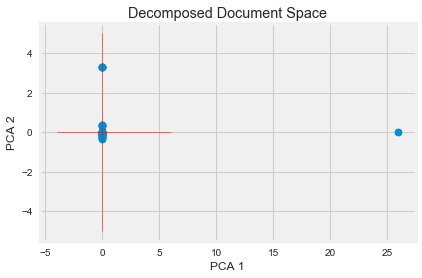

In [33]:
'''I know I have lots of outliers but I am just doing this for the sake of the project not because of its relevance'''

x = [x[0] for x in data]
y = [x[1] for x in data]
offsets = [(0.2,-0.5),(0.2,0.),(0.2,0.),(0.2,0.),(0.2,0.)]
fig, ax = plt.subplots()
ax.scatter(x,y);
ax.plot([-4,6],[0,0],'r-',lw=0.5)
ax.plot([0,0],[-5,5],'r-',lw=0.5)
plt.xlabel("PCA 1");
plt.ylabel("PCA 2");
plt.title("Decomposed Document Space");

In [34]:
'''3D PCA'''

pca3 = PCA(n_components = 3)
data3 = pca3.fit_transform(vec_df)
print(data3)

[[-0.05246341 -0.02542897 -0.05592212]
 [-0.05145873 -0.01905857 -0.04983589]
 [-0.052393   -0.02672844 -0.04136071]
 ..., 
 [-0.0513811  -0.018507   -0.04827853]
 [-0.05149676 -0.0191843  -0.05008608]
 [-0.05161    -0.01957256 -0.05170577]]


In [35]:
'''400D PCA'''

pca4 = PCA(n_components = 400)
data4 = pca3.fit_transform(vec_df)

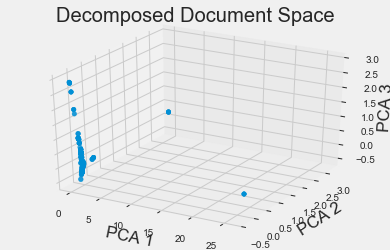

In [36]:
'''3D Plot of PCA'''

plt.style.use("fivethirtyeight")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = [x[0] for x in data3]
y = [x[1] for x in data3]
z = [x[2] for x in data3]
x.append(0)
y.append(0)
z.append(0)
# names = ['mom','dad','screw you zach','mom2','mom3','(0,0,0)']
offset = [(-1.1,-1,0.2),(0.1,0.1,0.1),(0.1,0.1,0.1),(0.1,0.1,0.1),(0.1,0.1,-0.5),(0.1,0.1,0.1)]
styles = [0]*5
styles.append(1)
ax.scatter(x,y,z)
ax.set_xlabel("PCA 1");
ax.set_ylabel("PCA 2");
ax.set_zlabel("PCA 3");
plt.title("Decomposed Document Space");
# for i,_ in enumerate(x):
#     ax.text(x[i]+offset[i][0],y[i]+offset[i][1],z[i]+offset[i][2],names[i])

# Silhouettes

In [37]:
X = data4[:1000]

In [38]:
def plot_clusters(components, num_clusters, tfidf):
    plot_pca_reducer = PCA(n_components = components, random_state= 4444)
    plot_pca_reduced_X = plot_pca_reducer.fit_transform(tfidf)
    sil_list = []
    for n in list(range(2, num_clusters + 1)):
        num_clusters = n
        km = KMeans(n_clusters=num_clusters, random_state = 4444)
        km.fit(plot_pca_reduced_X)
        clusters = km.labels_.tolist()
        sil_list.append(silhouette_score(plot_pca_reduced_X, clusters))
    plt.plot(list(range(2, num_clusters + 1)), sil_list)
    plt.title('Silhouette Score vs Num of Clusters with ' + str(components) + ' Components')

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.990257457606
For n_clusters = 3 The average silhouette_score is : 0.94433856858
For n_clusters = 4 The average silhouette_score is : 0.89817807043
For n_clusters = 5 The average silhouette_score is : 0.851324091372
For n_clusters = 6 The average silhouette_score is : 0.84030747692


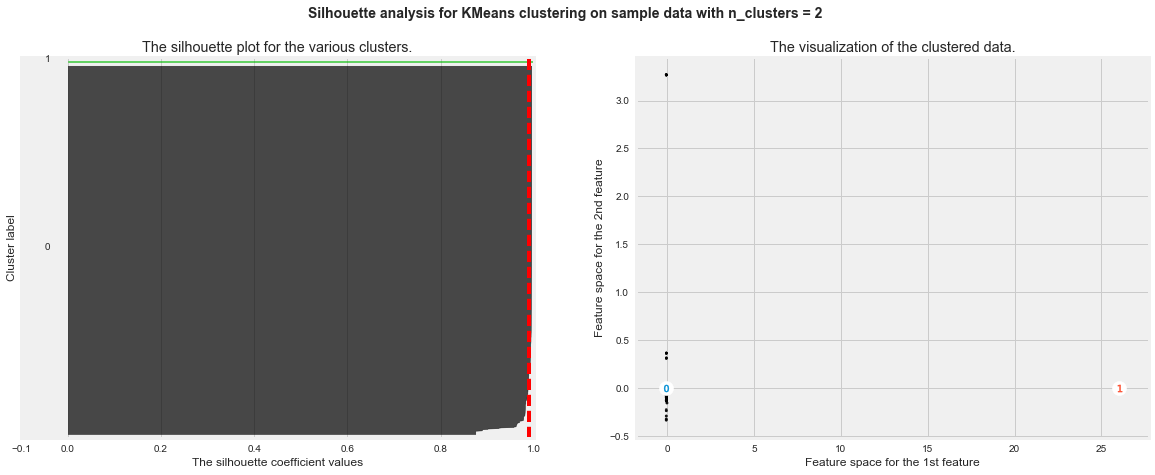

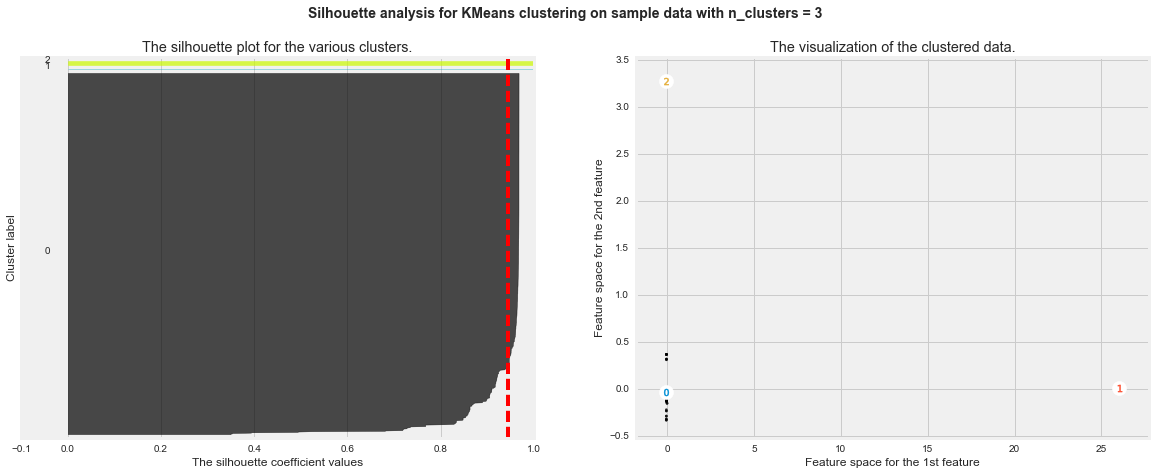

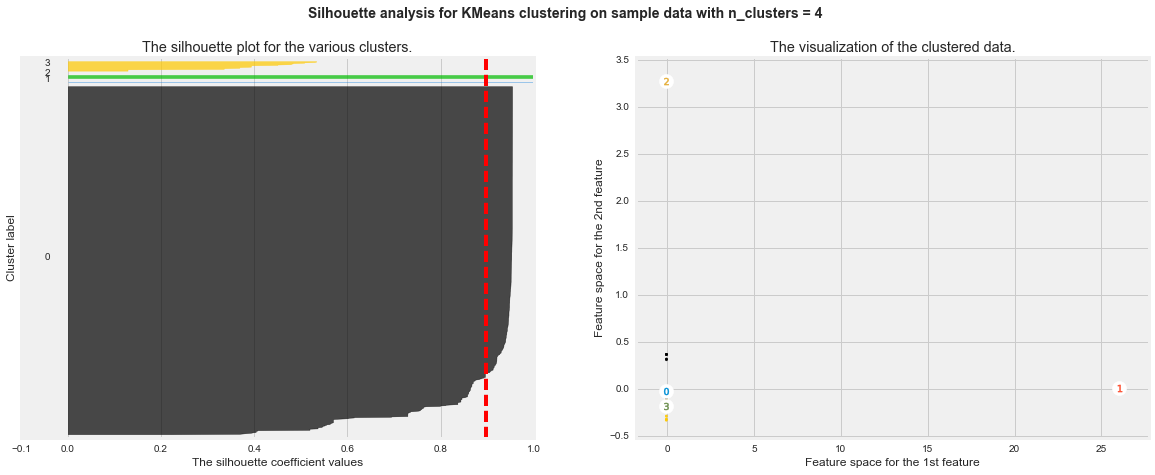

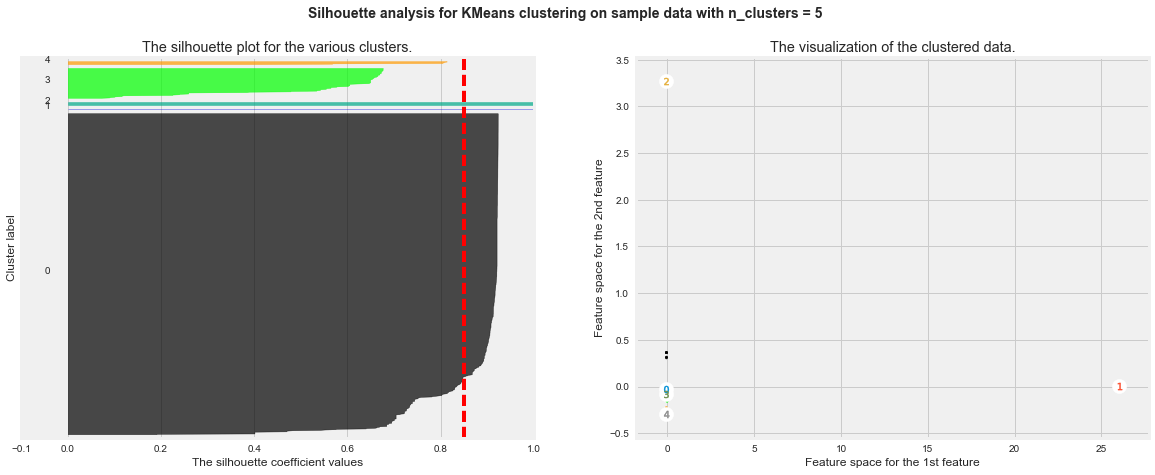

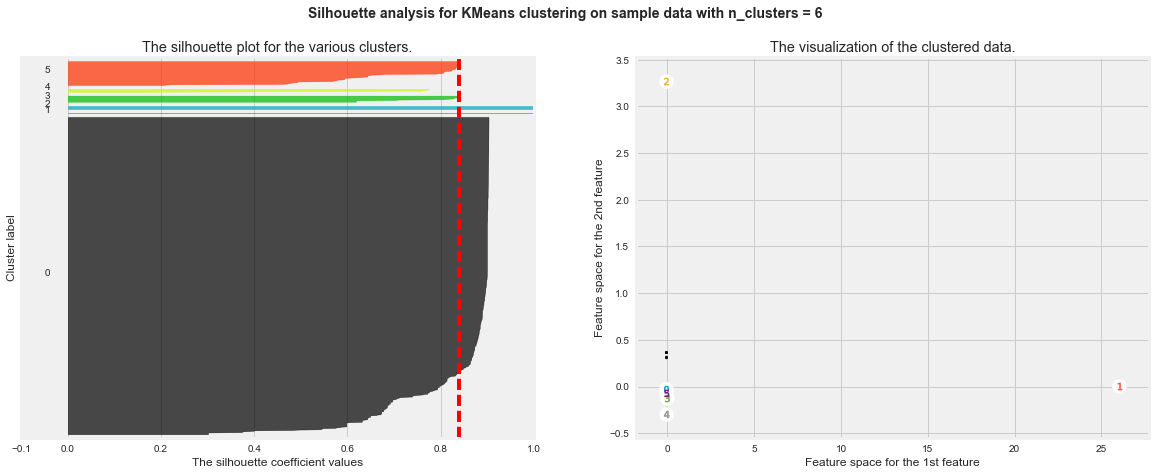

In [39]:
'''Again this looks weird because of the outliers'''

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

# SVD

In [41]:
'''SVD'''

svd = TruncatedSVD(n_components=400, random_state=16)
svd_fit = svd.fit_transform(counts)
# fit_lsa_n = Normalizer(copy=False).fit_transform(fit_lsa_n)

In [42]:
'''SVD sum'''

sum(svd.explained_variance_ratio_)

0.83490763041846539

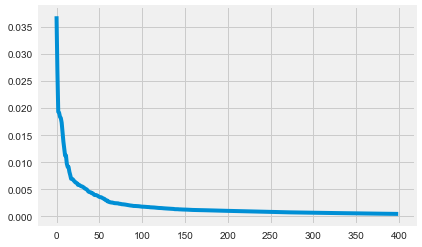

In [43]:
'''Elbow plot'''

plt.plot(svd.explained_variance_ratio_);

# Topic Modeling

In [127]:
'''Stopwords'''

stopword = stopwords.words('english')
stopword += ['?','!','.',',',':',';','it','is','i','im','the','me','my']

In [180]:
'''Make text variable with slice of lyrics'''

texts = [[word for word in lyric.lower().split() if word not in stopword] for lyric in flat_test[3000:3050]]

In [181]:
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

In [182]:
texts = [[token for token in text if frequency[token] > 1]
          for text in texts]

from pprint import pprint  # pretty-printer
pprint(texts)

[['see',
  'birds',
  'someone',
  'goes',
  'past',
  'sky',
  'takes',
  'imagination',
  'everythings',
  'remote',
  'control',
  'case',
  'whats',
  'far',
  'side',
  'road',
  'tell',
  'everybody',
  'going',
  'away',
  'ten',
  'years',
  'going',
  'wander',
  'among',
  'wicklow',
  'hills',
  'children',
  'clothes',
  'lost',
  'street',
  'fat',
  'dog',
  'motorway',
  'takes',
  'imagination',
  'everythings',
  'remote',
  'control',
  'case',
  'whats',
  'far',
  'side',
  'road',
  'tell',
  'everybody',
  'going',
  'away',
  'ten',
  'years',
  'going',
  'wander',
  'among',
  'wicklow',
  'hills'],
 ['everybody',
  'knew',
  'nobody',
  'said',
  'week',
  'ago',
  'last',
  'tuesday',
  'fifteen',
  'years',
  'reached',
  'full',
  'went',
  'grotto',
  'field',
  'middle',
  'island',
  'baby',
  'died',
  'died',
  'week',
  'ago',
  'last',
  'tuesday',
  'sad',
  'slow',
  'death',
  'everybody',
  'knew',
  'nobody',
  'said',
  'grotto',
  'field',
  '

In [183]:
dictionary = corpora.Dictionary(texts)
dictionary.save('/tmp/deerwester.dict')  # store the dictionary, for future reference
print(dictionary)

Dictionary(731 unique tokens: ['see', 'birds', 'someone', 'goes', 'past']...)


In [184]:
print(dictionary.token2id)

{'see': 0, 'birds': 1, 'someone': 2, 'goes': 3, 'past': 4, 'sky': 5, 'takes': 6, 'imagination': 7, 'everythings': 8, 'remote': 9, 'control': 10, 'case': 11, 'whats': 12, 'far': 13, 'side': 14, 'road': 15, 'tell': 16, 'everybody': 17, 'going': 18, 'away': 19, 'ten': 20, 'years': 21, 'wander': 22, 'among': 23, 'wicklow': 24, 'hills': 25, 'children': 26, 'clothes': 27, 'lost': 28, 'street': 29, 'fat': 30, 'dog': 31, 'motorway': 32, 'knew': 33, 'nobody': 34, 'said': 35, 'week': 36, 'ago': 37, 'last': 38, 'tuesday': 39, 'fifteen': 40, 'reached': 41, 'full': 42, 'went': 43, 'grotto': 44, 'field': 45, 'middle': 46, 'island': 47, 'baby': 48, 'died': 49, 'sad': 50, 'slow': 51, 'death': 52, 'oh': 53, 'avondale': 54, 'lingered': 55, 'lovely': 56, 'vale': 57, 'tall': 58, 'trees': 59, 'whisper': 60, 'low': 61, 'tale': 62, 'avondales': 63, 'proud': 64, 'eagle': 65, 'ancient': 66, 'fade': 67, 'land': 68, 'laid': 69, 'like': 70, 'thirty': 71, 'paid': 72, 'long': 73, 'cursed': 74, 'sea': 75, 'sweet': 7

In [185]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [186]:
corpora.MmCorpus.serialize('/tmp/deerwester.mm', corpus)  # store to disk, for later use
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 4), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)], [(17, 2), (21, 1), (33, 2), (34, 2), (35, 2), (36, 2), (37, 2), (38, 2), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 2), (46, 2), (47, 2), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1)], [(21, 1), (28, 1), (53, 2), (54, 2), (55, 2), (56, 3), (57, 2), (58, 2), (59, 2), (60, 2), (61, 2), (62, 2), (63, 4), (64, 4), (65, 4), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1)], [(21, 1), (28, 1), (53, 2), (68, 1), (70, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 3), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 3), (99, 2), (100, 2), (1

In [187]:
'''Most common words by song'''

for i,vector in enumerate(corpus):
    most_index, most_count = max(vector, key=lambda item: item[1])
    print("Song " + str(i+1) + " most used word: ",end='')
    print(dictionary[most_index], most_count)

Song 1 most used word: going 4
Song 2 most used word: everybody 2
Song 3 most used word: avondales 4
Song 4 most used word: derry 3
Song 5 most used word: goes 4
Song 6 most used word: earth 4
Song 7 most used word: night 9
Song 8 most used word: giuseppe 5
Song 9 most used word: morning 5
Song 10 most used word: chorus 7
Song 11 most used word: died 4
Song 12 most used word: veronica 7
Song 13 most used word: like 6
Song 14 most used word: bayou 7
Song 15 most used word: bound 6
Song 16 most used word: dont 7
Song 17 most used word: yeah 6
Song 18 most used word: road 7
Song 19 most used word: baby 6
Song 20 most used word: love 9
Song 21 most used word: rock 4
Song 22 most used word: moon 14
Song 23 most used word: mercy 4
Song 24 most used word: bye 16
Song 25 most used word: daughter 4
Song 26 most used word: higher 20
Song 27 most used word: oh 2
Song 28 most used word: love 4
Song 29 most used word: take 7
Song 30 most used word: darling 4
Song 31 most used word: find 6
Song 32 m

In [188]:
'''LSI model for topic finding'''

lsi = gensim.models.LsiModel(corpus, id2word=dictionary, num_topics=5)
lsi.print_topics()

[(0,
  '0.885*"go" + 0.272*"johnny" + 0.135*"love" + 0.121*"let" + 0.085*"higher" + 0.080*"goode" + 0.080*"b" + 0.074*"little" + 0.065*"cant" + 0.058*"would"'),
 (1,
  '-0.780*"love" + 0.231*"go" + -0.154*"dont" + -0.142*"let" + 0.124*"johnny" + -0.120*"come" + -0.116*"know" + -0.097*"like" + -0.087*"nobody" + -0.083*"little"'),
 (2,
  '-0.493*"love" + 0.280*"higher" + 0.250*"dont" + 0.210*"nobody" + 0.195*"get" + 0.186*"come" + 0.183*"little" + 0.172*"bye" + 0.172*"bother" + 0.148*"know"'),
 (3,
  '-0.434*"higher" + 0.292*"nobody" + 0.291*"bother" + 0.290*"dont" + -0.190*"get" + 0.185*"would" + -0.178*"let" + 0.161*"like" + 0.156*"never" + -0.155*"gotta"'),
 (4,
  '-0.643*"jo" + -0.372*"leo" + 0.194*"higher" + -0.181*"said" + -0.178*"back" + -0.169*"elephant" + 0.125*"bye" + -0.115*"got" + -0.101*"coconut" + -0.101*"fight"')]

In [189]:
'''LSI TFIDF'''

tfidf2 = gensim.models.TfidfModel(corpus, normalize=True)
corpus_tfidf = tfidf2[corpus]
lsi_tfidf = gensim.models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=5)
lsi_tfidf.print_topics()

[(0,
  '0.318*"love" + 0.169*"let" + 0.159*"cant" + 0.156*"baby" + 0.155*"need" + 0.155*"go" + 0.131*"dont" + 0.127*"want" + 0.127*"darling" + 0.123*"would"'),
 (1,
  '-0.385*"love" + -0.200*"cant" + -0.171*"need" + -0.163*"want" + -0.162*"let" + 0.148*"chorus" + -0.117*"show" + -0.112*"darling" + -0.110*"go" + 0.109*"drifting"'),
 (2,
  '0.382*"baby" + 0.287*"drifting" + 0.213*"wanted" + -0.199*"go" + -0.177*"higher" + 0.169*"byebye" + -0.152*"let" + -0.148*"johnny" + 0.138*"love" + -0.128*"cant"'),
 (3,
  '-0.293*"bound" + 0.241*"bye" + 0.233*"higher" + -0.212*"love" + -0.143*"derry" + -0.131*"earth" + -0.120*"many" + -0.119*"fool" + -0.119*"angel" + 0.112*"go"'),
 (4,
  '-0.300*"love" + 0.209*"cant" + -0.206*"show" + 0.174*"go" + 0.164*"bound" + 0.160*"drifting" + -0.148*"higher" + 0.146*"darling" + -0.129*"gotta" + -0.115*"road"')]

In [190]:
'''LDA for topic finding'''

lda = gensim.models.LdaModel(corpus, id2word=dictionary, num_topics=5)
lda.print_topics()

[(0,
  '0.023*"love" + 0.019*"go" + 0.014*"bye" + 0.014*"little" + 0.013*"dont" + 0.013*"know" + 0.012*"girl" + 0.010*"let" + 0.009*"would" + 0.009*"like"'),
 (1,
  '0.050*"go" + 0.019*"dark" + 0.017*"johnny" + 0.011*"said" + 0.010*"jo" + 0.009*"back" + 0.009*"got" + 0.007*"jaguar" + 0.007*"earth" + 0.006*"oh"'),
 (2,
  '0.032*"love" + 0.015*"let" + 0.010*"night" + 0.009*"like" + 0.009*"go" + 0.009*"earth" + 0.008*"oh" + 0.007*"fool" + 0.007*"little" + 0.007*"cant"'),
 (3,
  '0.013*"love" + 0.012*"would" + 0.012*"like" + 0.011*"get" + 0.010*"come" + 0.009*"little" + 0.009*"road" + 0.008*"dont" + 0.008*"oh" + 0.008*"let"'),
 (4,
  '0.039*"love" + 0.018*"go" + 0.013*"dont" + 0.012*"let" + 0.011*"nobody" + 0.009*"know" + 0.009*"come" + 0.009*"night" + 0.008*"would" + 0.008*"day"')]

In [191]:
'''Dominant topics for each chapter'''

for i in range(0,len(corpus)):
    print("Dominant Topics for Song " + str(i+1) +": ",end='')
    print(lda[corpus[i]])

Dominant Topics for Song 1: [(3, 0.98551315740422063)]
Dominant Topics for Song 2: [(2, 0.60378225063326663), (4, 0.37937787563852049)]
Dominant Topics for Song 3: [(1, 0.98249802217966453)]
Dominant Topics for Song 4: [(0, 0.98930243590468603)]
Dominant Topics for Song 5: [(2, 0.98943508894525711)]
Dominant Topics for Song 6: [(2, 0.077274797717235139), (3, 0.9151707529269123)]
Dominant Topics for Song 7: [(2, 0.99125175235214225)]
Dominant Topics for Song 8: [(0, 0.97684762393740043)]
Dominant Topics for Song 9: [(3, 0.98969707993702094)]
Dominant Topics for Song 10: [(1, 0.16879672803816345), (4, 0.8270240471749839)]
Dominant Topics for Song 11: [(4, 0.98717383603645792)]
Dominant Topics for Song 12: [(3, 0.98305334829816093)]
Dominant Topics for Song 13: [(0, 0.99175805008015661)]
Dominant Topics for Song 14: [(4, 0.99083286591018238)]
Dominant Topics for Song 15: [(2, 0.98333673562230295)]
Dominant Topics for Song 16: [(2, 0.15992648145057359), (3, 0.83449828174374496)]
Dominant T